# Project: Data Wrangling and Analysis with WeRateDogs Twitter data

## Table of Contents
<ol>
<li><a href="#gather">Gathering the data</a></li>
<li><a href="#assess">Assessing the data</a></li>
<li><a href="#clean"> Cleaning the data</a></li>    
    <ol>
        <li><a href="#quality"> 9 Quality issues </a></li>     
        <li><a href="#tidy"> 6 Tidiness issues </a></li> 
    </ol>
<li><a href="#analyze"> Analyzing the data</a></li>
</ol>

<a id='gather'></a>
## I. Gathering the data

- Upload given CSV file
- Download images programmatically using Requests
- Query Twitter API for each JSON data using Tweepy

In [1]:
#Import the necessary libraries for the project
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os 
from PIL import Image
from io import BytesIO

In [2]:
# Read the given CSV file of WeRateDogs Twitter Archive into Pandas DataFrame
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#Programatically download the image prediction data from the link

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [4]:
# Check the downloaded file 
response.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

In [6]:
#Make a folder for the image prediction data, save the file in the folder, and check the content of the data 

folder_name = 'image-predictions'

if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
file_name = url.split('/')[-1]

with open (os.path.join(folder_name, file_name), mode = 'wb') as file:
    file.write(response.content)
    
image_prediction_df = pd.read_csv('image-predictions/image-predictions.tsv', sep='\t')
image_prediction_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
#Go through the authentification process to use Tweepy API

consumer_key = 'CONFIDENTIAL'
consumer_secret = 'CONFIDENTIAL'
access_token = 'CONFIDENTIAL'
access_secret = 'CONFIDENTIAL'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [8]:
#Explore the tweet_ids in the archive_df
tweet_ids = list(archive_df['tweet_id'])
tweet_ids

[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256,
 891087950875897856,
 890971913173991426,
 890729181411237888,
 890609185150312448,
 890240255349198849,
 890006608113172480,
 889880896479866881,
 889665388333682689,
 889638837579907072,
 889531135344209921,
 889278841981685760,
 888917238123831296,
 888804989199671297,
 888554962724278272,
 888202515573088257,
 888078434458587136,
 887705289381826560,
 887517139158093824,
 887473957103951883,
 887343217045368832,
 887101392804085760,
 886983233522544640,
 886736880519319552,
 886680336477933568,
 886366144734445568,
 886267009285017600,
 886258384151887873,
 886054160059072513,
 885984800019947520,
 885528943205470208,
 885518971528720385,
 885311592912609280,
 885167619883638784,
 884925521741709313,
 884876753390489601,
 884562892145688576,
 884441805382717440,
 884247878851493888,
 884162670584377345,
 883838122936631299,
 883482846933004288,
 883360690899218434,
 883117836046

In [17]:
#Try the get_status code to see the result
tweet_id_trial = '748220828303695873'
tweet = api.get_status(tweet_id_trial, tweet_mode='extended', wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
tweet._json['favorite_count']

13844

In [18]:
#Iterate to collect favorite_ccount and retweet_count for all of the ids in the column of tweet_id in archive_df 

tweet_ids = list(archive_df['tweet_id'])

tweet_data = []
error_ids = []

for tweet_id in tweet_ids:
    try:
        tweets = api.get_status(tweet_id, tweet_mode='extended', wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        favorites = tweets._json['favorite_count']
        retweets = tweets._json['retweet_count']
        tweet_data.append({'tweet_id': tweet_id,
                           'favorites':favorites,
                           'retweets': retweets})
    except:
        error_ids.append(tweet_id)
        
tweet_data_df = pd.DataFrame(tweet_data, columns = ['tweet_id', 'favorites', 'retweets'])
tweet_data_df.head(10)

Rate limit reached. Sleeping for: 489
Rate limit reached. Sleeping for: 734


,tweet_id,favorites,retweets
0,892420643555336193,35380,7469
1,892177421306343426,30618,5545
2,891815181378084864,23033,3671
3,891689557279858688,38664,7645
4,891327558926688256,36950,8243
5,891087950875897856,18629,2759
6,890971913173991426,10819,1792
7,890729181411237888,59619,16711
8,890609185150312448,25631,3813
9,890240255349198849,29252,6482


In [19]:
#Save the collected data into a txt file and read 5 lines
tweet_data_df.to_csv('tweet_json.txt',encoding='utf-8',index=False)

<a id='assess'></a>
## II. Assessing the data

Explore and assess the three tables below:
- archive_df
- image_prediction_df
- tweet_data_df

In [2]:
# Reading all the tadbles needed for the cleaning 

archive_df = pd.read_csv('twitter-archive-enhanced.csv')
image_prediction_df = pd.read_csv('image-predictions/image-predictions.tsv', sep='\t')
tweet_data_df = pd.read_csv('tweet_json.txt')

In [3]:
# Explore the table 
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [5]:
archive_df.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1047,743510151680958465,NaN,NaN,2016-06-16 18:26:48 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Beya. She doesn't want to swim, so she...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/743510151...,13,10,Beya,None,None,None,None
1855,675531475945709568,NaN,NaN,2015-12-12 04:23:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ellie AKA Queen Slayer of the Orbs. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675531475...,10,10,Ellie,None,None,None,None
1237,712309440758808576,NaN,NaN,2016-03-22 16:06:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Reminder that we made our first set of sticker...,NaN,NaN,NaN,https://twitter.com/stickergrub/status/7099191...,12,10,None,None,None,pupper,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
224,849336543269576704,NaN,NaN,2017-04-04 19:03:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",At first I thought this was a dog because of t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/849336543...,11,10,None,None,None,None,None
326,833826103416520705,NaN,NaN,2017-02-20 23:50:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Charlie. She asked u to change the channe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/833826103...,13,10,Charlie,None,None,None,None
689,787717603741622272,NaN,NaN,2016-10-16 18:11:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tonks. She is a service puppo. Can hea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/787717603...,13,10,Tonks,None,None,None,puppo
419,822244816520155136,NaN,NaN,2017-01-20 00:50:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send pics of m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822244816...,11,10,None,None,None,None,None
281,839290600511926273,NaN,NaN,2017-03-08 01:44:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @alexmartindawg: THE DRINK IS DR. PUPPER 10...,8.392899e+17,4.119842e+07,2017-03-08 01:41:24 +0000,https://twitter.com/alexmartindawg/status/8392...,10,10,None,None,None,pupper,None
1958,673580926094458881,NaN,NaN,2015-12-06 19:13:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you ask your professor about extra credit...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673580926...,8,10,None,None,None,None,None


In [6]:
archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [7]:
image_prediction_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
201,669682095984410625,https://pbs.twimg.com/media/CUswUBRUAAAahAo.jpg,1,Christmas_stocking,0.188397,False,studio_couch,0.086887,False,bookcase,0.082599,False
1248,747816857231626240,https://pbs.twimg.com/media/CmDHdCoWkAACTB4.jpg,1,Pembroke,0.768923,True,Chihuahua,0.029053,True,Shetland_sheepdog,0.029035,True
746,687664829264453632,https://pbs.twimg.com/media/CYsTg1XUsAEPjxE.jpg,1,pug,0.957365,True,French_bulldog,0.038559,True,toy_poodle,0.000667,True
1052,714141408463036416,https://pbs.twimg.com/media/Cekj0qwXEAAHcS6.jpg,1,Labrador_retriever,0.586951,True,golden_retriever,0.378812,True,redbone,0.003605,True
287,671154572044468225,https://pbs.twimg.com/media/CVBrhXoWIAAox_C.jpg,1,Labrador_retriever,0.495047,True,Chesapeake_Bay_retriever,0.350188,True,golden_retriever,0.142400,True


In [8]:
image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
tweet_data_df.head()

,tweet_id,favorites,retweets
0,892420643555336193,35380,7469
1,892177421306343426,30618,5545
2,891815181378084864,23033,3671
3,891689557279858688,38664,7645
4,891327558926688256,36950,8243


In [10]:
tweet_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id     2331 non-null int64
favorites    2331 non-null int64
retweets     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


#### 9 Quality issues
##### `archive_df` table
1. tweet_id should be a string not an integer 
2. timestamp is a string
3. timestamp column has unnecessary +0000 in the end 
4. Source column can be clearer with just the name of the source
5. Unexpected number in rating_denominator (max: 170)
6. Unexpected number in rating_numerator (max: 1776)



##### `image_prediction_df` table
7. tweet_id should be a string not an integer 
8. data in p1, p2 and p3 can be all lower case


##### `tweet_data_df` table
9. tweet_id should be a string not an integer 

#### 6 Tidiness issues
1. Drop unnecessary columns: 'in_reply_to_status_id', 'in_reply_to_user_id','retweet_status_id', 'retweet_status_user_id', 'retweet_status_timestamp'
2. Four variables in four columns in `archive_df` table (doggo, floofer, pupper, puppo)
3. tweet_data_df can be merged to archive_df
4. Drop the data withouth the photo
5. Make a simpler image_prediction_df with only the best guess
6. Rename the columns to make it more understandable

*As I am going to merge the dataframe in the tidiness issue, I thought it is logical to fix the quality issue first and then fix the tidiness issues.*

<a id='clean'></a>
## III. Cleaning the data

In [11]:
# Make a copy of each dataframes before cleaning 
archive_df_clean = archive_df.copy()
image_prediction_df_clean = image_prediction_df.copy()
tweet_data_df_clean = tweet_data_df.copy()

<a id='quality'></a>
### 1) 9 Quality issues

##### `archive_df` table

##### 1. Define: 
- Change the datatype of tweet_id from integer to a string 

##### Code

In [12]:
archive_df_clean.tweet_id = archive_df_clean.tweet_id.astype(str)

##### Test

In [13]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

##### 2. Define
- Erase the unnecessary +0000 from the timestamp column using strip() 


##### Code

In [14]:
archive_df_clean.timestamp = archive_df_clean.timestamp.str.strip("+0000")

##### Test

In [15]:
archive_df_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2326,666411507551481857,NaN,NaN,2015-11-17 00:24:19,"<a href=""http://twitter.com/download/iphone"" r...",This is quite the dog. Gets really excited whe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666411507...,2,10,quite,None,None,None,None
286,838831947270979586,NaN,NaN,2017-03-06 19:21:35,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Riley. His owner put a ...,7.838400e+17,4.196984e+09,2016-10-06 01:23:05 +0000,https://twitter.com/dog_rates/status/783839966...,13,10,Riley,None,None,None,None
526,808838249661788160,NaN,NaN,2016-12-14 00:57:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Ito. He'll be your uber driver tonight...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808838249...,13,10,Ito,None,None,None,None
859,763183847194451968,NaN,NaN,2016-08-10 01:23:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He collects teddy bears. It's a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/763183847...,8,10,Clark,None,None,None,None
2029,671855973984772097,NaN,NaN,2015-12-02 00:58:41,"<a href=""http://twitter.com/download/iphone"" r...",Remarkable dog here. Walks on back legs really...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671855973...,8,10,None,None,None,None,None
314,835172783151792128,NaN,NaN,2017-02-24 17:01:22,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send in any no...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835172783...,12,10,None,None,None,None,None
855,764857477905154048,NaN,NaN,2016-08-14 16:13:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Aubie. He has paws for days. Nibbling ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/764857477...,12,10,Aubie,None,None,None,None
704,785872687017132033,NaN,NaN,2016-10-11 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rusty. He appears to be rather h*ckin flu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785872687...,12,10,Rusty,None,None,None,None
882,760290219849637889,NaN,NaN,2016-08-02 01:44:48,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Rocco. He's doing his best. 13/10 some...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760290219...,13,10,Rocco,None,None,None,None
67,879376492567855104,NaN,NaN,2017-06-26 16:31:08,"<a href=""http://twitter.com/download/iphone"" r...",This is Jack AKA Stephen Furry. You're not sco...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879376492...,12,10,Jack,None,None,None,None


##### 3. Define
- Change the datatype of timestamp from a string to timestamp

##### Code

In [16]:
archive_df_clean.timestamp = pd.to_datetime(archive_df_clean.timestamp)

In [17]:
archive_df_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
995,748346686624440324,NaN,NaN,2016-06-30 02:45:28,"<a href=""http://twitter.com/download/iphone"" r...","""So... we meat again"" (I'm so sorry for that p...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/748346686...,10,10,None,None,None,None,None
796,773247561583001600,NaN,NaN,2016-09-06 19:52:39,"<a href=""http://twitter.com/download/iphone"" r...",This is Chip. He's a pupholder. Comes with the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/773247561...,10,10,Chip,None,None,None,None
1113,733109485275860992,NaN,NaN,2016-05-19 01:38:16,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
1541,689623661272240129,NaN,NaN,2016-01-20 01:41:08,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's terrified of the stuffed b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689623661...,10,10,Lucy,None,None,pupper,None
1345,704491224099647488,7.044857e+17,2.878549e+07,2016-03-01 02:19:31,"<a href=""http://twitter.com/download/iphone"" r...",13/10 hero af\n@ABC,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
711,784517518371221505,NaN,NaN,2016-10-07 22:15:26,"<a href=""http://twitter.com/download/iphone"" r...",This is Frankie. He has yet to learn how to co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/784517518...,11,10,Frankie,None,None,None,None
1281,708810915978854401,NaN,NaN,2016-03-13 00:24:26,"<a href=""http://twitter.com/download/iphone"" r...",This is Mister. He's a wonderful father to his...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708810915...,10,10,Mister,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
1473,693647888581312512,NaN,NaN,2016-01-31 04:11:58,"<a href=""http://twitter.com/download/iphone"" r...",What kind of person sends in a pic without a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693647888...,7,10,None,None,None,None,None
2068,671138694582165504,NaN,NaN,2015-11-30 01:28:28,"<a href=""http://twitter.com/download/iphone"" r...",Me running from commitment. 10/10 https://t.co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671138694...,10,10,None,None,None,None,None


##### Test

In [18]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

##### 4. Define
- Replace the current data with only the name of the sources



##### Code

In [19]:
archive_df_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [20]:
archive_df_clean.source.replace({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'Twitter for iPhone', 
                                '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'Vine - Make a Scene',
                                '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':'Twitter Web Client', 
                                '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':'TweetDeck'}, inplace=True)

##### Test

In [21]:
archive_df_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [22]:
archive_df_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1898,674690135443775488,NaN,NaN,2015-12-09 20:40:38,Twitter for iPhone,Meet Patrick. He's an exotic pup. Jumps great ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674690135...,3,10,Patrick,None,None,None,None
2053,671485057807351808,NaN,NaN,2015-12-01 00:24:48,Twitter for iPhone,Meet Penelope. She is a white Macadamias Duode...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671485057...,11,10,Penelope,None,None,None,None
1229,713761197720473600,NaN,NaN,2016-03-26 16:15:05,Twitter for iPhone,This is Piper. She would really like that tenn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713761197...,12,10,Piper,None,None,None,None
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26,Twitter for iPhone,This is Bo. He's a West Congolese Bugaboop Snu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,None,None,None,None
1146,727155742655025152,NaN,NaN,2016-05-02 15:20:13,Vine - Make a Scene,When you're trying to enjoy yourself but end u...,NaN,NaN,NaN,https://vine.co/v/ixa1ejbXiM7,11,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35,Twitter for iPhone,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
1833,676146341966438401,NaN,NaN,2015-12-13 21:07:04,Twitter for iPhone,This is Bert. He likes flowers. 10/10 https://...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676146341...,10,10,Bert,None,None,None,None
1110,733822306246479872,NaN,NaN,2016-05-21 00:50:46,Twitter for iPhone,This is Moose. He's a Polynesian Floofer. Dapp...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/733822306...,10,10,Moose,None,floofer,None,None
115,870374049280663552,NaN,NaN,2017-06-01 20:18:38,Twitter for iPhone,This is Zoey. She really likes the planet. Wou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/870374049...,13,10,Zoey,None,None,None,None
1890,674767892831932416,NaN,NaN,2015-12-10 01:49:36,Twitter for iPhone,This pup was carefully tossed to make it look ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674767892...,12,10,None,None,None,None,None


##### 5. Define
- Unexpected number in rating_numerator and rating_denominator (max: 1776)

##### Code

In [23]:
# Sort the denominators in the data
archive_df_clean['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [24]:
archive_df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [25]:
#Create a new dataframe with tweet_id, text, rating_numerator, rating_denominator for cleaning
rating_df_clean = archive_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls','name', 'doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [26]:
# filter the data without denominator value 10
rating_df_clean = rating_df_clean[rating_df_clean.rating_denominator != 10]

In [27]:
# Make the columns text wider to read the full text
pd.set_option("display.max_colwidth", 280)

In [28]:
# Verify the actual rating in the text. If there is no rating, change to None. If the big number is written in the text, do not change. Do not change if there is no link for photo. 
rating_df_clean

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


In [29]:
# Change the rating vaulue for tweet_id 810984652412424192 to None
archive_df_clean.loc[archive_df_clean.tweet_id == 810984652412424192, 'rating_numerator'] = None
archive_df_clean.loc[archive_df_clean.tweet_id == 810984652412424192, 'rating_denominator'] = None

In [30]:
# Change the rating vaulue for tweet_id 740373189193256964 to 14/10
archive_df_clean.loc[archive_df_clean.tweet_id == 740373189193256964, 'rating_numerator'] = 14
archive_df_clean.loc[archive_df_clean.tweet_id == 740373189193256964, 'rating_denominator'] = 10

In [31]:
# Change the rating vaulue for tweet_id 722974582966214656 to 13/10
archive_df_clean.loc[archive_df_clean.tweet_id == 722974582966214656, 'rating_numerator'] = 13
archive_df_clean.loc[archive_df_clean.tweet_id == 722974582966214656, 'rating_denominator'] = 10

In [32]:
# Change the rating vaulue for tweet_id 716439118184652801 to 11/10
archive_df_clean.loc[archive_df_clean.tweet_id == 716439118184652801, 'rating_numerator'] = 11
archive_df_clean.loc[archive_df_clean.tweet_id == 716439118184652801, 'rating_denominator'] = 10

In [33]:
# Change the rating vaulue for tweet_id 682962037429899265 to 10/10
archive_df_clean.loc[archive_df_clean.tweet_id == 682962037429899265, 'rating_numerator'] = 10
archive_df_clean.loc[archive_df_clean.tweet_id == 682962037429899265, 'rating_denominator'] = 10

In [34]:
# Change the rating vaulue for tweet_id 666287406224695296 to 9/10
archive_df_clean.loc[archive_df_clean.tweet_id == 666287406224695296, 'rating_numerator'] = 9
archive_df_clean.loc[archive_df_clean.tweet_id == 666287406224695296, 'rating_denominator'] = 10

##### Test

In [35]:
archive_df_clean['rating_denominator'].value_counts()

10.0     2333
11.0        3
50.0        3
20.0        2
80.0        2
110.0       1
0.0         1
15.0        1
7.0         1
150.0       1
16.0        1
120.0       1
2.0         1
170.0       1
70.0        1
130.0       1
90.0        1
40.0        1
Name: rating_denominator, dtype: int64

##### 6. Define
- Unexpected number in the rating_numerator

##### Code

In [36]:
# Sort the numerators in the data
archive_df_clean['rating_numerator'].value_counts()

12.0      558
11.0      464
10.0      461
13.0      351
9.0       158
8.0       102
7.0        55
14.0       54
5.0        37
6.0        32
3.0        19
4.0        17
1.0         9
2.0         9
75.0        2
15.0        2
420.0       2
0.0         2
144.0       1
666.0       1
121.0       1
182.0       1
165.0       1
17.0        1
45.0        1
204.0       1
960.0       1
1776.0      1
84.0        1
24.0        1
27.0        1
88.0        1
99.0        1
50.0        1
80.0        1
60.0        1
44.0        1
20.0        1
26.0        1
143.0       1
Name: rating_numerator, dtype: int64

In [37]:
#Create a new dataframe with tweet_id, text, rating_numerator, rating_denominator for cleaning
rating_df_clean2 = archive_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls','name', 'doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [38]:
# Filter the data with rating value greater than 17
rating_df_clean2 = rating_df_clean2[rating_df_clean2['rating_numerator']>17]

In [39]:
# Verify the actual rating in the text. If there is no rating, change to None. If the big number is written in the text, do not change. Do not change if there is no link for photo. 

rating_df_clean2

,tweet_id,text,rating_numerator,rating_denominator
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420.0,10.0
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666.0,10.0
290,838150277551247360,@markhoppus 182/10,182.0,10.0
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960.0,0.0
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75.0,10.0
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10.0
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0


In [40]:
# Change the rating vaulue for tweet_id 786709082849828864 to 9.75/10
archive_df_clean.loc[archive_df_clean.tweet_id == 786709082849828864, 'rating_numerator'] = 9.75
archive_df_clean.loc[archive_df_clean.tweet_id == 786709082849828864, 'rating_denominator'] = 10

In [41]:
# Change the rating vaulue for tweet_id 778027034220126208 to 11.27/10
archive_df_clean.loc[archive_df_clean.tweet_id == 778027034220126208, 'rating_numerator'] = 11.27
archive_df_clean.loc[archive_df_clean.tweet_id == 778027034220126208, 'rating_denominator'] = 10

In [42]:
# Change the rating vaulue for tweet_id 716439118184652801 to 11/10
archive_df_clean.loc[archive_df_clean.tweet_id == 716439118184652801, 'rating_numerator'] = 11
archive_df_clean.loc[archive_df_clean.tweet_id == 716439118184652801, 'rating_denominator'] = 10

In [43]:
# Change the rating vaulue for tweet_id 680494726643068929 to 11.26/10
archive_df_clean.loc[archive_df_clean.tweet_id == 680494726643068929, 'rating_numerator'] = 11.26
archive_df_clean.loc[archive_df_clean.tweet_id == 680494726643068929, 'rating_denominator'] = 10

##### Test

In [44]:
archive_df_clean['rating_numerator'].value_counts()

12.0      558
11.0      464
10.0      461
13.0      351
9.0       158
8.0       102
7.0        55
14.0       54
5.0        37
6.0        32
3.0        19
4.0        17
1.0         9
2.0         9
75.0        2
15.0        2
420.0       2
0.0         2
144.0       1
666.0       1
121.0       1
182.0       1
165.0       1
17.0        1
45.0        1
204.0       1
960.0       1
1776.0      1
84.0        1
24.0        1
27.0        1
88.0        1
99.0        1
50.0        1
80.0        1
60.0        1
44.0        1
20.0        1
26.0        1
143.0       1
Name: rating_numerator, dtype: int64

##### `image_prediction_df` table

##### 7. Define
- tweet_id should be a string not an integer 

##### Code

In [45]:
image_prediction_df_clean.tweet_id = image_prediction_df_clean.tweet_id.astype(str)

##### Test

In [46]:
image_prediction_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


##### 8. Define
- data in p1, p2 and p3 can be all lower case

##### Code

In [47]:
image_prediction_df_clean.p1 = image_prediction_df_clean.p1.str.lower()

In [48]:
image_prediction_df_clean.p2 = image_prediction_df_clean.p2.str.lower()

In [49]:
image_prediction_df_clean.p3 = image_prediction_df_clean.p3.str.lower()

##### Test

In [50]:
image_prediction_df_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
351,672523490734551040,https://pbs.twimg.com/media/CVVIjGbWwAAxkN0.jpg,1,golden_retriever,0.565981,True,chow,0.081212,True,irish_terrier,0.061596,True
1561,793286476301799424,https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg,1,afghan_hound,0.274637,True,borzoi,0.142204,True,doormat,0.109677,False
276,670840546554966016,https://pbs.twimg.com/media/CU9N6upXAAAbtQe.jpg,1,shih-tzu,0.963622,True,lhasa,0.016017,True,guinea_pig,0.007932,False
1883,847251039262605312,https://pbs.twimg.com/media/C8IKUjAUwAEP-En.jpg,1,airedale,0.495380,True,irish_terrier,0.316456,True,lakeland_terrier,0.158533,True
1152,732585889486888962,https://pbs.twimg.com/media/Ciqq-VFUUAANlWm.jpg,2,staffordshire_bullterrier,0.843359,True,american_staffordshire_terrier,0.028290,True,miniature_pinscher,0.016793,True
456,674774481756377088,https://pbs.twimg.com/media/CV1HztsWoAAuZwo.jpg,1,chihuahua,0.407016,True,french_bulldog,0.309978,True,siamese_cat,0.227677,False
922,702217446468493312,https://pbs.twimg.com/media/Cb7HCMkWEAAV9zY.jpg,1,golden_retriever,0.242419,True,chow,0.226800,True,cocker_spaniel,0.194086,True
1096,720059472081784833,https://pbs.twimg.com/media/Cf4qRcmWEAA9V4h.jpg,1,mexican_hairless,0.451852,True,redbone,0.254884,True,italian_greyhound,0.094818,True
765,689143371370250240,https://pbs.twimg.com/media/CZBUO2UWsAAKehS.jpg,1,english_springer,0.303781,True,papillon,0.165132,True,welsh_springer_spaniel,0.149051,True
1376,763183847194451968,https://pbs.twimg.com/media/CpdfpzKWYAAWSUi.jpg,1,miniature_poodle,0.354674,True,toy_poodle,0.338642,True,teddy,0.155828,False


##### `tweet_data_df` table

##### 9. Define
- tweet_id should be a string not an integer 

##### Code

In [51]:
tweet_data_df_clean.tweet_id = tweet_data_df_clean.tweet_id.astype(str)

##### Test

In [52]:
tweet_data_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id     2331 non-null object
favorites    2331 non-null int64
retweets     2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


<a id='tidy'></a>
### 2) 4 Tidiness issues

##### 1. Define

- Leave the data that does not have retweeted_status_id and in_reply_to_status_id
- Drop unnecessary columns: 'in_reply_to_status_id', 'in_reply_to_user_id','retweet_status_id', 'retweet_status_user_id', 'retweet_status_timestamp'
- archive_df can be merged to tweet_data_df



##### Code

In [53]:
archive_df_clean = archive_df_clean[archive_df_clean.retweeted_status_id.isnull()]

In [54]:
archive_df_clean = archive_df_clean[archive_df_clean.in_reply_to_status_id.isnull()]

In [55]:
# Drop unnecessay columns
archive_df_clean = archive_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'], axis=1)

##### Test

In [56]:
archive_df_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2251,667806454573760512,2015-11-20 20:47:20,Twitter for iPhone,This is Filup. He is overcome with joy after finally meeting his father. 10/10 https://t.co/TBmDJXJB75,https://twitter.com/dog_rates/status/667806454573760512/photo/1,10.0,10.0,Filup,None,None,None,None
1728,679872969355714560,2015-12-24 03:55:21,Vine - Make a Scene,This is Rocco. He's in a very intense game of freeze tag. Currently waiting to be unfrozen 10/10 https://t.co/xZXUKVXJ7l,https://vine.co/v/iAAxTbj1UAM,10.0,10.0,Rocco,None,None,None,None
791,773704687002451968,2016-09-08 02:09:06,Twitter for iPhone,This is Loki. He knows he's adorable. One ear always pupared. 12/10 would snug in depicted fashion forever https://t.co/OqNggd4Oio,"https://twitter.com/dog_rates/status/773704687002451968/photo/1,https://twitter.com/dog_rates/status/773704687002451968/photo/1",12.0,10.0,Loki,None,None,None,None
1390,700151421916807169,2016-02-18 02:54:41,Twitter for iPhone,If a pupper gave that to me I'd probably start shaking and faint from all the joy. 11/10 https://t.co/o9aJVPB25n,https://twitter.com/dog_rates/status/700151421916807169/photo/1,11.0,10.0,None,None,None,pupper,None
1364,702899151802126337,2016-02-25 16:53:11,Vine - Make a Scene,Say hello to Luna. Her tongue is malfunctioning (tragic). 12/10 please enjoy (vid by @LilyArtz) https://t.co/F9aLnADVIw,https://vine.co/v/i6iIrBwnTFI,12.0,10.0,Luna,None,None,None,None


In [57]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 213.0+ KB


##### 2. Define
- Four variables in four columns in `archive_df` table (doggo, floofer, pupper, puppo)

##### Code

In [58]:
archive_df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [59]:
archive_df_clean = pd.melt(archive_df_clean, id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name'], var_name='types', value_name='type_value')

In [60]:
# Sort the changed table with type_values. The result will show None first
archive_df_clean = archive_df_clean.sort_values('type_value')

In [61]:
archive_df_clean.head(16)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,types,type_value
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,doggo,None
5582,684914660081053696,2016-01-07 01:49:14,Twitter for iPhone,"""Hello yes I'll just get one of each color thanks"" 12/10 for all https://t.co/AMDsllQs7a",https://twitter.com/dog_rates/status/684914660081053696/photo/1,12.0,10.0,None,pupper,None
5581,684926975086034944,2016-01-07 02:38:10,Twitter for iPhone,Meet Bruiser &amp; Charlie. They are the best of pals. Been through it all together. Both 11/10. 1 like=1 friendship https://t.co/PEXHuvSVD4,https://twitter.com/dog_rates/status/684926975086034944/photo/1,11.0,10.0,Bruiser,pupper,None
5580,684940049151070208,2016-01-07 03:30:07,Twitter for iPhone,This is Oreo. She's a photographer and a model. Living a double pupple life. 12/10 such talent much cute would pet https://t.co/zNeLxJeAoL,"https://twitter.com/dog_rates/status/684940049151070208/photo/1,https://twitter.com/dog_rates/status/684940049151070208/photo/1",12.0,10.0,Oreo,pupper,None
5579,684959798585110529,2016-01-07 04:48:36,Twitter for iPhone,This is Jerry. He's a neat dog. No legs (tragic). Has more horns than a dog usually does. Bark is unique af. 5/10 https://t.co/85q7xlplsJ,https://twitter.com/dog_rates/status/684959798585110529/photo/1,5.0,10.0,Jerry,pupper,None
5577,685198997565345792,2016-01-07 20:39:06,Twitter for iPhone,This is Alfie. That is his time machine. He's very proud of it. Without him life as we know it would not exist 11/10 https://t.co/530Yfbl5xo,https://twitter.com/dog_rates/status/685198997565345792/photo/1,11.0,10.0,Alfie,pupper,None
5575,685307451701334016,2016-01-08 03:50:03,Twitter for iPhone,Say hello to Petrick. He's an Altostratus Floofer. Just had a run in with a trash bag. Groovy checkered floor. 11/10 https://t.co/rwW7z1JAOF,https://twitter.com/dog_rates/status/685307451701334016/photo/1,11.0,10.0,Petrick,pupper,None
5574,685315239903100929,2016-01-08 04:21:00,Twitter for iPhone,I would like everyone to appreciate this pup's face as much as I do. 11/10 https://t.co/QIe7oxkSNo,"https://twitter.com/dog_rates/status/685315239903100929/photo/1,https://twitter.com/dog_rates/status/685315239903100929/photo/1",11.0,10.0,None,pupper,None
5573,685321586178670592,2016-01-08 04:46:13,Twitter for iPhone,This is Rocky. He sleeps like a psychopath. 10/10 quality tongue slip https://t.co/MbgG95mUdu,https://twitter.com/dog_rates/status/685321586178670592/photo/1,10.0,10.0,Rocky,pupper,None
5572,685325112850124800,2016-01-08 05:00:14,Twitter for iPhone,"""Tristan do not speak to me with that kind of tone or I will take away the Xbox."" 10/10 https://t.co/VGPH0TfESw",https://twitter.com/dog_rates/status/685325112850124800/photo/1,10.0,10.0,None,pupper,None


In [62]:
#Drop the 3 other pairs that are duplicated and keep the last one 
archive_df_clean = archive_df_clean.drop_duplicates('tweet_id', keep = 'last')

In [63]:
archive_df_clean = archive_df_clean.drop(['types'], axis=1)

##### Test

In [64]:
archive_df_clean.type_value.value_counts()

None       1761
pupper      230
doggo        72
puppo        24
floofer      10
Name: type_value, dtype: int64

In [65]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 2021 to 6856
Data columns (total 9 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
name                  2097 non-null object
type_value            2097 non-null object
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 163.8+ KB


In [66]:
archive_df_clean.type_value.value_counts()

None       1761
pupper      230
doggo        72
puppo        24
floofer      10
Name: type_value, dtype: int64

In [67]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 2021 to 6856
Data columns (total 9 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
name                  2097 non-null object
type_value            2097 non-null object
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 163.8+ KB


In [68]:
archive_df_clean.type_value.value_counts()

None       1761
pupper      230
doggo        72
puppo        24
floofer      10
Name: type_value, dtype: int64

In [69]:
archive_df_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type_value
4059,668507509523615744,2015-11-22 19:13:05,Twitter for iPhone,This is a Birmingham Quagmire named Chuk. Loves to relax and watch the game while sippin on that iced mocha. 10/10 https://t.co/HvNg9JWxFt,https://twitter.com/dog_rates/status/668507509523615744/photo/1,10.0,10.0,a,None
5598,684147889187209216,2016-01-04 23:02:22,Vine - Make a Scene,This is Sweets the English Bulldog. Waves back to other bikers. 12/10 just a fantastic friendly pupper https://t.co/WYiFzuX7D4,https://vine.co/v/ib2nTOEuuOI,12.0,10.0,Sweets,pupper
3340,694183373896572928,2016-02-01 15:39:48,Twitter for iPhone,This is Lola. She realized mid hug that she's not ready for a committed relationship with a teddy bear. 9/10 https://t.co/pVebzwRioD,"https://twitter.com/dog_rates/status/694183373896572928/photo/1,https://twitter.com/dog_rates/status/694183373896572928/photo/1",9.0,10.0,Lola,None
2821,754482103782404096,2016-07-17 01:05:25,Twitter for iPhone,This is Milo. He's currently plotting his revenge. 10/10 https://t.co/ca0q9HM8II,https://twitter.com/dog_rates/status/754482103782404096/video/1,10.0,10.0,Milo,None
3374,691675652215414786,2016-01-25 17:35:00,Twitter for iPhone,This is Richie and Plip. They are the best of pals. Do everything together. 10/10 for both https://t.co/KMdwNgONkV,https://twitter.com/dog_rates/status/691675652215414786/photo/1,10.0,10.0,Richie,None
2608,789628658055020548,2016-10-22 00:45:17,Twitter for iPhone,This is Eli. He can fly. 13/10 magical af https://t.co/huPSJJ7FDI,https://twitter.com/dog_rates/status/789628658055020548/photo/1,13.0,10.0,Eli,None
4005,669393256313184256,2015-11-25 05:52:43,Twitter for iPhone,Meet Ronduh. She's a Finnish Checkered Blitzkrieg. Ears look fake. Shoes on point. 10/10 would pet extra well https://t.co/juktj5qiaD,https://twitter.com/dog_rates/status/669393256313184256/photo/1,10.0,10.0,Ronduh,None
2058,666644823164719104,2015-11-17 15:51:26,Twitter for iPhone,This is Jimothy. He is a Botwanian Gouda. Can write (impressive). Very erect tail. Still looking for hoco date. 9/10 https://t.co/LEkZjZxESQ,https://twitter.com/dog_rates/status/666644823164719104/photo/1,9.0,10.0,Jimothy,None
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10.0,None,None
3387,690728923253055490,2016-01-23 02:53:03,Twitter for iPhone,This is Vinscent. He was just questioned about his recent credit card spending. 8/10 https://t.co/qOD4G19A2u,https://twitter.com/dog_rates/status/690728923253055490/photo/1,8.0,10.0,Vinscent,None


##### 3. Define
- archive_df can be merged to tweet_data_df

##### Code

In [70]:
twitter_df_clean = pd.merge(archive_df_clean,tweet_data_df_clean , how = "outer", on =['tweet_id'])

In [71]:
twitter_df_clean.tweet_id = twitter_df_clean.tweet_id.astype(str)

##### Test

In [72]:
twitter_df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type_value,favorites,retweets
0,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,https://twitter.com/dog_rates/status/667405339315146752/photo/1,7.0,10.0,Biden,None,432.0,206.0
1,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689202614272/photo/1,12.0,10.0,None,None,286.0,79.0
2,667437278097252352,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx,https://twitter.com/dog_rates/status/667437278097252352/photo/1,10.0,10.0,None,None,420.0,217.0
3,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N,https://twitter.com/dog_rates/status/667443425659232256/photo/1,6.0,10.0,None,None,724.0,534.0
4,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,https://twitter.com/dog_rates/status/667453023279554560/photo/1,11.0,10.0,Cupcake,None,290.0,81.0


##### 4. Define
- Drop the data without photo


##### Code

In [73]:
# Copy the dataframe to keep the original safe 
image_prediction_copy = image_prediction_df_clean.copy()

In [74]:
image_prediction_copy.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [75]:
# Leave only tweet_id and jpr_url
image_prediction_copy = image_prediction_copy.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1)

In [76]:
image_prediction_copy.head()

,tweet_id,jpg_url
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg


In [77]:
# Merge the image_prediction_copy on left join 
twitter_df_clean = pd.merge(twitter_df_clean,image_prediction_copy, how = "left", on =['tweet_id'])

In [78]:
twitter_df_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type_value,favorites,retweets,jpg_url
0,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,https://twitter.com/dog_rates/status/667405339315146752/photo/1,7.0,10.0,Biden,None,432.0,206.0,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg


In [79]:
# Drop the data from image_prediction_copy that are not in the twitter_df_clean 
twitter_df_clean = twitter_df_clean[twitter_df_clean['timestamp'].notnull()]

In [80]:
# Drop the data from image_prediction_copy that are not in the twitter_df_clean 
twitter_df_clean = twitter_df_clean[twitter_df_clean['favorites'].notnull()]

##### Test

In [81]:
twitter_df_clean.sample(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type_value,favorites,retweets,jpg_url
2085,802239329049477120,2016-11-25 19:55:35,Twitter for iPhone,This is Loki. He'll do your taxes for you. Can also make room in your budget for all the things you bought today. 12/10 what a puppo https://t.co/5oWrHCWg87,"https://twitter.com/dog_rates/status/802239329049477120/photo/1,https://twitter.com/dog_rates/status/802239329049477120/photo/1",12.0,10.0,Loki,puppo,9064.0,2611.0,https://pbs.twimg.com/media/CyIgaTEVEAA-9zS.jpg


In [82]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2096
Data columns (total 12 columns):
tweet_id              2090 non-null object
timestamp             2090 non-null datetime64[ns]
source                2090 non-null object
text                  2090 non-null object
expanded_urls         2087 non-null object
rating_numerator      2090 non-null float64
rating_denominator    2090 non-null float64
name                  2090 non-null object
type_value            2090 non-null object
favorites             2090 non-null float64
retweets              2090 non-null float64
jpg_url               1964 non-null object
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 212.3+ KB


##### 5. Define

- Make a simpler image_prediction_df with only the best guess
- If p1 is correct, leave only p1
- If p2 is correct, leave only p2
- If p3 is correct, leave only p3
- If p3 is not correct, leave "unknown"
- Merge the simpler image_prediction_df to the master dataframe

##### Code

In [83]:
simple_image_prediction_df = image_prediction_df_clean.copy()

In [84]:
simple_image_prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


In [85]:
simple_image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [86]:
# Creat a function to leave only the breed of the dog and iterate

best_guess_dict = {}

def best_guess(prediction):
    if prediction['p1_dog'] == True:
        best_guess_dict[prediction['tweet_id']] = [prediction['p1']]
    elif prediction['p2_dog'] == True:
        best_guess_dict[prediction['tweet_id']] = [prediction['p1']]
    elif prediction['p3_dog'] == True:
        best_guess_dict[prediction['tweet_id']] = [prediction['p1']]
    else:
        best_guess_dict[prediction['tweet_id']] = ['unknown'] 

simple_image_prediction_df.apply(best_guess, axis =1)
 
best_guess_df = pd.DataFrame.from_dict(best_guess_dict, orient = 'index') 

In [87]:
best_guess_df.head()

,0
666020888022790149,welsh_springer_spaniel
666029285002620928,redbone
666033412701032449,german_shepherd
666044226329800704,rhodesian_ridgeback
666049248165822465,miniature_pinscher


In [88]:
best_guess_df = best_guess_df.reset_index()

In [89]:
best_guess_df.head()

,index,0
0,666020888022790149,welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,german_shepherd
3,666044226329800704,rhodesian_ridgeback
4,666049248165822465,miniature_pinscher


In [90]:
best_guess_df = best_guess_df.rename(columns={'index':'tweet_id', 0:'best_guess_dog_breed'})

In [91]:
best_guess_df.head()

,tweet_id,best_guess_dog_breed
0,666020888022790149,welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,german_shepherd
3,666044226329800704,rhodesian_ridgeback
4,666049248165822465,miniature_pinscher


In [92]:
best_guess_df['best_guess_dog_breed'].value_counts()

unknown                      324
golden_retriever             150
labrador_retriever           100
pembroke                      89
chihuahua                     83
pug                           57
chow                          44
samoyed                       43
toy_poodle                    39
pomeranian                    38
malamute                      30
cocker_spaniel                30
french_bulldog                26
chesapeake_bay_retriever      23
miniature_pinscher            23
seat_belt                     21
german_shepherd               20
siberian_husky                20
staffordshire_bullterrier     20
cardigan                      19
maltese_dog                   18
shetland_sheepdog             18
beagle                        18
eskimo_dog                    18
shih-tzu                      17
lakeland_terrier              17
rottweiler                    17
italian_greyhound             16
kuvasz                        16
great_pyrenees                14
          

In [93]:
twitter_df_clean = pd.merge(twitter_df_clean,best_guess_df, how = "inner", on =['tweet_id'])

##### Test

In [94]:
best_guess_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 2 columns):
tweet_id                2075 non-null object
best_guess_dog_breed    2075 non-null object
dtypes: object(2)
memory usage: 32.5+ KB


In [95]:
twitter_df_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type_value,favorites,retweets,jpg_url,best_guess_dog_breed
0,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,https://twitter.com/dog_rates/status/667405339315146752/photo/1,7.0,10.0,Biden,None,432.0,206.0,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,saint_bernard


In [96]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 13 columns):
tweet_id                1964 non-null object
timestamp               1964 non-null datetime64[ns]
source                  1964 non-null object
text                    1964 non-null object
expanded_urls           1964 non-null object
rating_numerator        1964 non-null float64
rating_denominator      1964 non-null float64
name                    1964 non-null object
type_value              1964 non-null object
favorites               1964 non-null float64
retweets                1964 non-null float64
jpg_url                 1964 non-null object
best_guess_dog_breed    1964 non-null object
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 214.8+ KB


##### 6. Define
- Rename the columns to make it more understandable

##### Code

In [97]:
twitter_df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'type_value',
       'favorites', 'retweets', 'jpg_url', 'best_guess_dog_breed'],
      dtype='object')

In [98]:
twitter_df_clean = twitter_df_clean.rename(columns={'name':'dog_name', 'type_value':'dog_type'})

##### Test

In [99]:
twitter_df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_type,favorites,retweets,jpg_url,best_guess_dog_breed
0,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,https://twitter.com/dog_rates/status/667405339315146752/photo/1,7.0,10.0,Biden,None,432.0,206.0,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,saint_bernard
1,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689202614272/photo/1,12.0,10.0,None,None,286.0,79.0,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,rottweiler
2,667437278097252352,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx,https://twitter.com/dog_rates/status/667437278097252352/photo/1,10.0,10.0,None,None,420.0,217.0,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,unknown
3,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N,https://twitter.com/dog_rates/status/667443425659232256/photo/1,6.0,10.0,None,None,724.0,534.0,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,unknown
4,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,https://twitter.com/dog_rates/status/667453023279554560/photo/1,11.0,10.0,Cupcake,None,290.0,81.0,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,labrador_retriever


In [100]:
# Saving df as csv
twitter_df_clean.to_csv('twitter_archive_master.csv')
image_prediction_df_clean.to_csv('image_prediction_df_clean_final.csv')
best_guess_df.to_csv('image_prediction_df_simpler.csv')

<a id='analyze'></a>
## IV. Anlayzing the data

1. The expected average of the rating_numerator with the confidence level 95%
2. Correlation between favorites and retweets
3.  The rank of the average score for each dog type

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

twitter_df = pd.read_csv('twitter_archive_master.csv')
image_df_clean = pd.read_csv('image_prediction_df_clean_final.csv')

#### 1. The expected average of the rating_numerator with the confidence level 95%

In [102]:
# Simulate 300 samplings and find the average rating_numerator value from twitter_df data
sample = twitter_df.rating_numerator.sample(300, replace = True)
sample.mean()

11.626666666666667

In [103]:
# Simulate the bootstrap sampling 10,000 times with the confidence level of 95%
bigger_sample = []
for i in range (10000):
    sample2 = twitter_df.rating_numerator.sample(300, replace = True)
    bigger_sample.append(sample2.mean())

In [104]:
left = np.percentile(bigger_sample, 2.5) 
right = np.percentile(bigger_sample, 97.5)
print(left, right)

10.4466666667 18.15


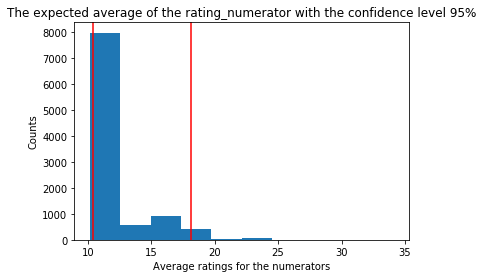

In [105]:
#Plot the result and find the 95% range
plt.hist(bigger_sample);
plt.axvline(left, color = 'r');
plt.axvline(right, color = 'r');
plt.title('The expected average of the rating_numerator with the confidence level 95%');
plt.xlabel('Average ratings for the numerators');
plt.ylabel('Counts');

**Insight 1:** we can expect the average ratings for the numerators for a new dog pictures on WeRateDogs to be in the range of **10.44 and 18.15 with 95% of confidence level.**

#### 2. Correlation between favorites and retweets

In [106]:
import statsmodels.api as sm

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [107]:
twitter_df_corr = pd.read_csv('twitter_archive_master.csv')
twitter_df_corr.head()

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_type,favorites,retweets,jpg_url,best_guess_dog_breed
0,0,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,https://twitter.com/dog_rates/status/667405339315146752/photo/1,7.0,10.0,Biden,None,432.0,206.0,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,saint_bernard
1,1,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689202614272/photo/1,12.0,10.0,None,None,286.0,79.0,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,rottweiler
2,2,667437278097252352,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx,https://twitter.com/dog_rates/status/667437278097252352/photo/1,10.0,10.0,None,None,420.0,217.0,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,unknown
3,3,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N,https://twitter.com/dog_rates/status/667443425659232256/photo/1,6.0,10.0,None,None,724.0,534.0,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,unknown
4,4,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,https://twitter.com/dog_rates/status/667453023279554560/photo/1,11.0,10.0,Cupcake,None,290.0,81.0,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,labrador_retriever


In [108]:
# Fit a linear regression model to predict number of retweets based on the number of favorites
twitter_df_corr['intercept']=1
lm = sm.OLS(twitter_df_corr['favorites'], twitter_df_corr[['intercept', 'retweets']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              favorites   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                 1.231e+04
Date:                Mon, 07 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:30:34   Log-Likelihood:                -19280.
No. Observations:                1964   AIC:                         3.856e+04
Df Residuals:                    1962   BIC:                         3.858e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1917.3396    114.798     16.702      0.000    1692.201    2142.478
retweets       2.5925      0.023    110.959      0.000       2.547       2.638
==============================================================================
Omnibus:                      520.843   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16764.693
Skew:                           0.577   Prob(JB):                         0.00
Kurtosis:                      17.266   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

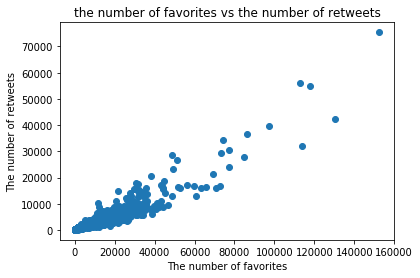

In [110]:
# Visualized the regression result
x = twitter_df_corr['favorites']
y = twitter_df_corr['retweets']

plt.scatter(x,y)
plt.xlabel('The number of favorites');
plt.ylabel('The number of retweets');
plt.title('the number of favorites vs the number of retweets');

**Insight 2:** we observed **positve correlation** between the number of favorites and the number of retweets.
For every **1 new favorite**, we can expect **the retweet to increase by 2.59**. 

#### 3. The ranking of the favorites by the dog breed - top 10

In [114]:
# Group the twitter_df and sort out the top 10 dog breeds 
twitter_df.groupby('best_guess_dog_breed')['favorites'].mean().sort_values(ascending=False)

best_guess_dog_breed
angora                     84592.000000
arabian_camel              74346.000000
bubble                     73223.000000
laptop                     60726.000000
conch                      43243.000000
paper_towel                38664.000000
hippopotamus               35971.000000
basketball                 31660.000000
upright                    30913.000000
remote_control             27354.000000
swing                      24468.166667
saluki                     21753.000000
refrigerator               20593.000000
mortarboard                18976.000000
french_bulldog             17107.600000
ice_bear                   16421.000000
cash_machine               16373.000000
syringe                    16095.000000
cowboy_boot                15559.000000
tricycle                   15486.000000
afghan_hound               15426.000000
giant_schnauzer            15399.000000
black-and-tan_coonhound    15329.500000
flat-coated_retriever      15162.625000
irish_water_spaniel

{'saluki': 21753.0, 'french_bulldog': 17107.599999999999, 'afghan_hound': 15426.0, 'giant_schnauzer': 15399.0, 'black-and-tan_coonhound': 15329.5, 'flat-coated_retriever': 15162.625, 'irish_water_spaniel': 14642.666666666666, 'standard_poodle': 14238.714285714286, 'english_springer': 14076.333333333334, 'leonberg': 13281.0}


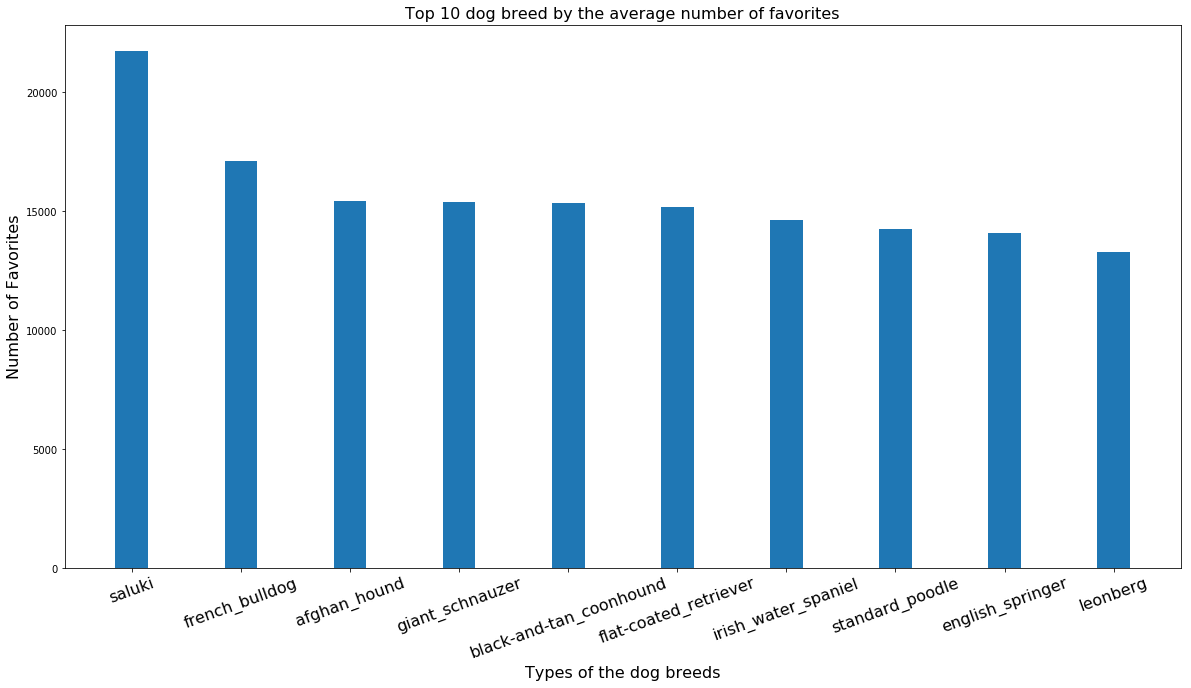

In [9]:
# Find the value for saluki, french_bulldog, afghan_hound, giant_schnauzer, black-and-tan_coonhound, flat-coated_retriever, irish_water_spaniel, standard_poodle, english_springer and leonberg 

rank_10 = {}

top_10_breed = ['saluki', 'french_bulldog', 'afghan_hound', 'giant_schnauzer', 'black-and-tan_coonhound', 'flat-coated_retriever', 'irish_water_spaniel', 'standard_poodle', 'english_springer','leonberg' ]

for i in top_10_breed:
    df = twitter_df[twitter_df['best_guess_dog_breed'] == i]
    fav_mean = df['favorites'].mean()
    rank_10[i] = fav_mean 
    
print(rank_10)    

# Create the bar chart 
f, ax = plt.subplots(figsize=(20,10));
plt.bar(range(len(rank_10)), list(rank_10.values()), align='center', width = 0.3);
plt.xticks(range(len(rank_10)), list(rank_10.keys()), rotation=20, fontsize=16);
plt.xlabel("Types of the dog breeds", fontsize=16);
plt.ylabel("Number of Favorites", fontsize=16);
plt.title("Top 10 dog breed by the average number of favorites", fontsize=16);

**Insight 3:** the dog breed with the biggest number of the average of the favorites is **Saluki**, followed by **french_bulldog, afghan_hound, giant_schnauzer, black-and-tan_coonhound, flat-coated_retriever, irish_water_spaniel, standard_poodle, english_springer and leonberg.**